In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [31]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Annual Income (INR)
0,1,1,19,15,39,2,1245000
1,2,1,21,15,81,2,1245000
2,3,0,20,16,6,3,1328000
3,4,0,23,16,77,2,1328000
4,5,0,31,17,40,2,1411000
...,...,...,...,...,...,...,...
195,196,0,35,120,79,1,9960000
196,197,0,45,126,28,4,10458000
197,198,1,32,126,74,1,10458000
198,199,1,32,137,18,4,11371000


In [4]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

In [5]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


In [6]:
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

In [21]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)

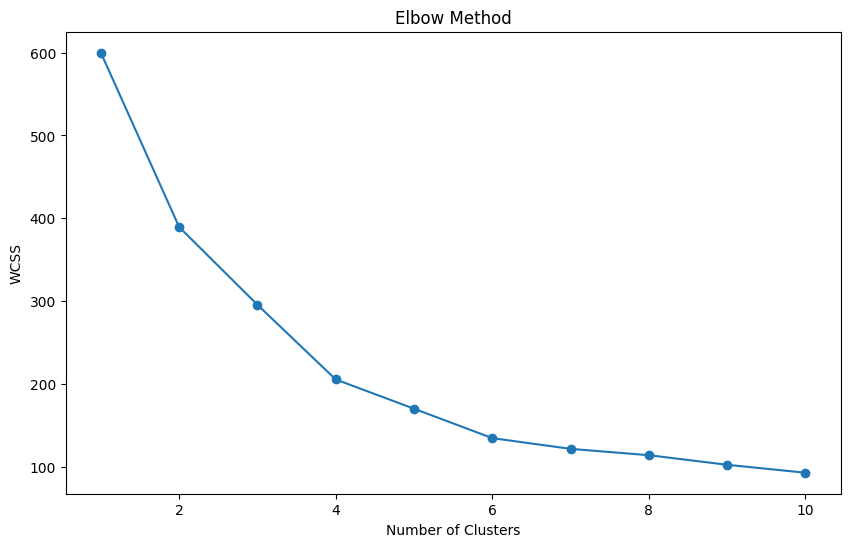

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [9]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

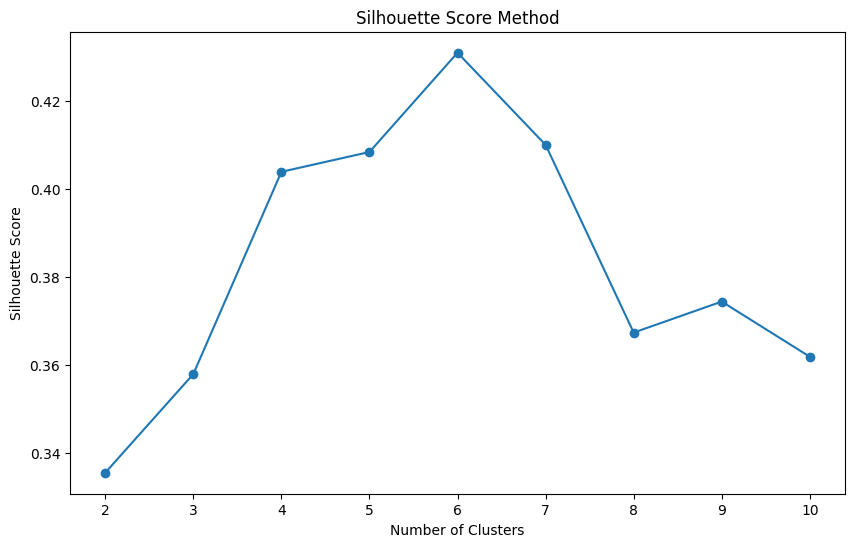

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [11]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

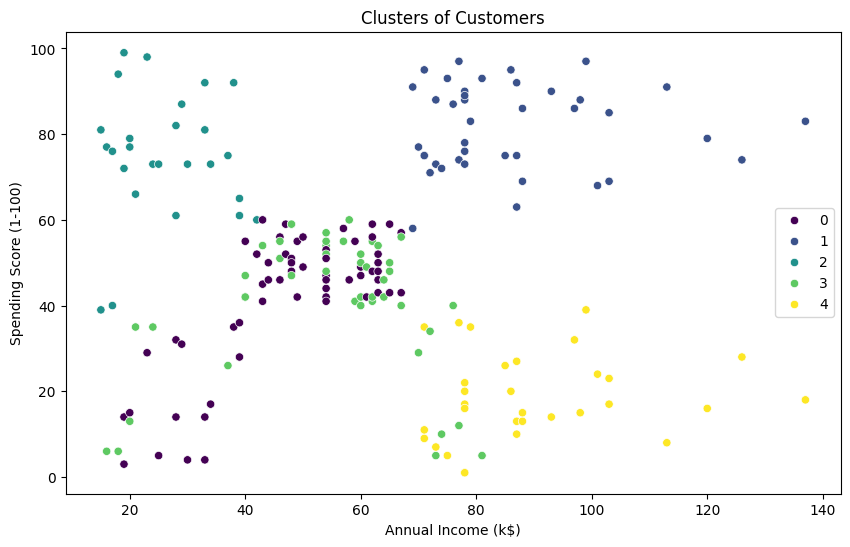

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [14]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df['Cluster'] = range(optimal_k)

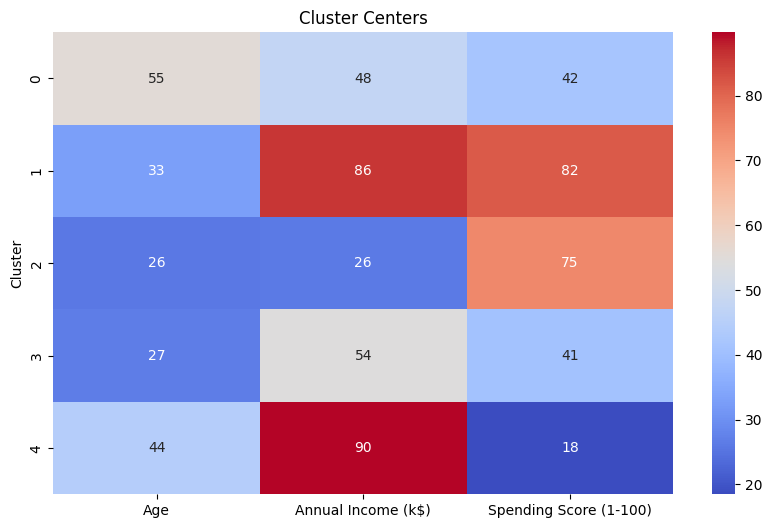

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df.set_index('Cluster'), annot=True, cmap='coolwarm')
plt.title('Cluster Centers')
plt.show()

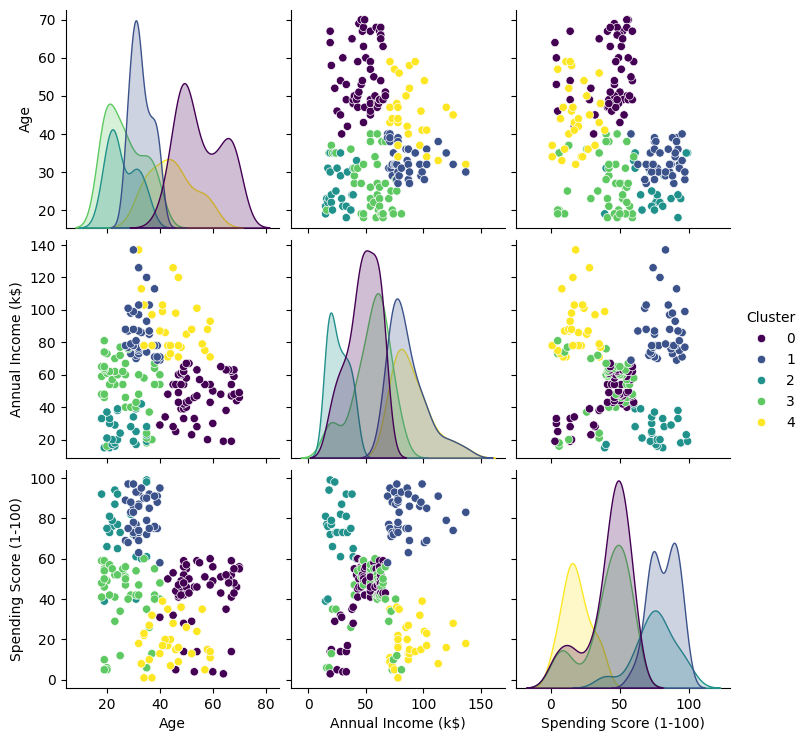

In [16]:
sns.pairplot(data, hue='Cluster', palette='viridis', vars=features)
plt.show()

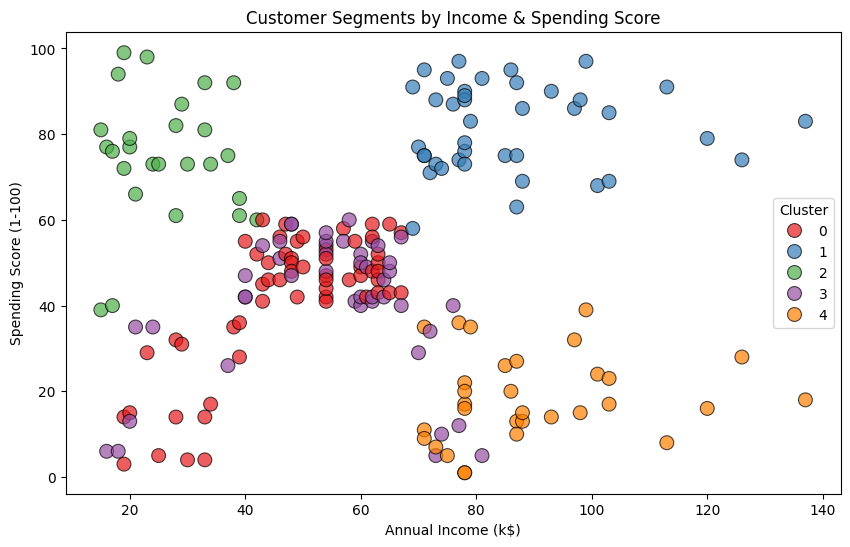

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=100,
    alpha=0.7,
    edgecolor='black'
)
plt.title("Customer Segments by Income & Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()


In [ ]:
cluster_summary = data.groupby('Cluster')[features].mean().reset_index()
print(cluster_summary)
data.to_csv('clustered_customers.csv', index=False)

   Cluster        Age  Annual Income (k$)  Spending Score (1-100)
0        0  55.275862           47.620690               41.706897
1        1  32.875000           86.100000               81.525000
2        2  25.769231           26.115385               74.846154
3        3  26.733333           54.311111               40.911111
4        4  44.387097           89.774194               18.483871
